# Sanity checks for TRACMIP ESGF data: diurnal surface temperature or near-surface air temperature over land

We verify that the diurnal cycle over land is much stronger than over ocean. This is an expected consequence of decreasing the surface heat capacity over land.

Data is taken from ESGF copy of TRACMIP at KIT SCC LSDFONLINE. The postprocessed data from the directory postdata_npz is used.

Note on data availability:

* no 3hr data for CALTECH (all exp), LMDZ5A (all exp), MetUM-CTL landOrbitTRACMIP, MetUM-ENT landOrbitTRACMIP, MPAS all land, CAM3 aqua4xCO2TRACMIP
* 3hr ts data available for CNRM-AM5 (all exp), MIROC (all exp), ECHAM61 (all exp), ECHAM63 (all exp), MPAS aqua, CAM4 (all exp), CAM3 (all but aqua4xCO2TRACMIP)
* 3hr tas data available for CNRM-AM5 (all exp), MIROC (all exp), ECHAM61 (all exp), ECHAM63 (all exp), MPAS aqua, CAM4 (all exp), CAM3 (all exp but aqua4xCO2TRACMIP), MetUM-CTL (all exp but landOrbitTRACMIP), MetUM-ENT (all exp but landOrbitTRACMIP)

* we also look at tasmax and tasmin from daily data

Because of data availability issues, for AM21, CAM5Nor and LMDZ5A custom analysis is made to check the increased diurnal cycle over land.

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# my module functions for tracmip data: plot colors, model names etc.
import tracmip as tm

import warnings
warnings.filterwarnings("ignore")

In [2]:
sinlat = np.sin(tm.latint*np.pi/180)

## Load surface temperature and near-surface temperature

In [3]:
def get_ts(exp):
    var='ts'
    return np.array(np.load('./postdata_npz/'+var+'_'+exp+'.3hr.last10days.npz')[var])    
def get_tas(exp):
    var='tas'
    return np.array(np.load('./postdata_npz/'+var+'_'+exp+'.3hr.last10days.npz')[var])   
def get_tasmax(exp):
    var='tasmax'
    return np.array(np.load('./postdata_npz/'+var+'_'+exp+'.day.last10days.npz')[var])   
def get_tasmin(exp):
    var='tasmin'
    return np.array(np.load('./postdata_npz/'+var+'_'+exp+'.day.last10days.npz')[var])   

In [5]:
ts_aqct = get_ts(exp='aquaControlTRACMIP')
ts_aq4x = get_ts(exp='aqua4xCO2TRACMIP')
ts_ldct = get_ts(exp='landControlTRACMIP')
ts_ld4x = get_ts(exp='land4xCO2TRACMIP')
ts_ldor = get_ts(exp='landOrbitTRACMIP')

tas_aqct = get_tas(exp='aquaControlTRACMIP')
tas_aq4x = get_tas(exp='aqua4xCO2TRACMIP')
tas_ldct = get_tas(exp='landControlTRACMIP')
tas_ld4x = get_tas(exp='land4xCO2TRACMIP')
tas_ldor = get_tas(exp='landOrbitTRACMIP')

In [6]:
tasmax_aqct = get_tasmax(exp='aquaControlTRACMIP')
tasmax_aq4x = get_tasmax(exp='aqua4xCO2TRACMIP')
tasmax_ldct = get_tasmax(exp='landControlTRACMIP')
tasmax_ld4x = get_tasmax(exp='land4xCO2TRACMIP')
tasmax_ldor = get_tasmax(exp='landOrbitTRACMIP')

tasmin_aqct = get_tasmin(exp='aquaControlTRACMIP')
tasmin_aq4x = get_tasmin(exp='aqua4xCO2TRACMIP')
tasmin_ldct = get_tasmin(exp='landControlTRACMIP')
tasmin_ld4x = get_tasmin(exp='land4xCO2TRACMIP')
tasmin_ldor = get_tasmin(exp='landOrbitTRACMIP')

## Plotting

In [7]:
def makeplot_latlon_amplitude(data, exp, varname):
    #_clev=0.1+0.1*np.linspace(-1,1,21)
    plt.figure(figsize=(30, 20))
    for m in range(tm.nmod):
        plt.subplot(3,5,m+1)
        c=plt.contourf(tm.lonint, sinlat, np.max(data[m], axis=0)-np.min(data[m], axis=0), cmap=cm.viridis)
        plt.colorbar(c, extend='both')
        plt.xlabel('lon'); plt.ylabel('sin(lat)')
        #plt.ylim(-0.7,0.7)
        plt.title(varname+' max-min from 3hr data over last 10 days:\n'+tm.modnames[m]+' '+exp)
    plt.subplot(3,5,15)
    plt.colorbar(c, extend='both')
    plt.savefig('./figs/'+varname+'_dailyamplitude_from3hrdata_'+exp+'.pdf')
    plt.close()

In [8]:
makeplot_latlon_amplitude(ts_aqct, exp='aquaControlTRACMIP', varname='ts')
makeplot_latlon_amplitude(ts_aq4x, exp='aqua4xCO2TRACMIP', varname='ts')
makeplot_latlon_amplitude(ts_ldct, exp='landControlTRACMIP', varname='ts')
makeplot_latlon_amplitude(ts_ld4x, exp='land4xCO2TRACMIP', varname='ts')
makeplot_latlon_amplitude(ts_ldor, exp='landOrbitTRACMIP', varname='ts')

makeplot_latlon_amplitude(tas_aqct, exp='aquaControlTRACMIP', varname='tas')
makeplot_latlon_amplitude(tas_aq4x, exp='aqua4xCO2TRACMIP', varname='tas')
makeplot_latlon_amplitude(tas_ldct, exp='landControlTRACMIP', varname='tas')
makeplot_latlon_amplitude(tas_ld4x, exp='land4xCO2TRACMIP', varname='tas')
makeplot_latlon_amplitude(tas_ldor, exp='landOrbitTRACMIP', varname='tas')

In [9]:
def makeplot_latlon_tasmax_minus_tasmin(datamax, datamin, exp):
    #_clev=0.1+0.1*np.linspace(-1,1,21)
    plt.figure(figsize=(30, 20))
    for m in range(tm.nmod):
        plt.subplot(3,5,m+1)
        c=plt.contourf(tm.lonint, sinlat, np.nanmean(datamax[m]-datamin[m], axis=0), cmap=cm.viridis)
        plt.colorbar(c, extend='both')
        plt.xlabel('lon'); plt.ylabel('sin(lat)')
        #plt.ylim(-0.7,0.7)
        plt.title('tasmax-tasmin from day data over last 10 days:\n'+tm.modnames[m]+' '+exp)
    plt.subplot(3,5,15)
    plt.colorbar(c, extend='both')
    plt.savefig('./figs/ts_dailyamplitude_fromdaily_tasmax_tasmin_'+exp+'.pdf')
    plt.close()

In [10]:
makeplot_latlon_tasmax_minus_tasmin(tasmax_aqct, tasmin_aqct, exp='aquaControlTRACMIP')
makeplot_latlon_tasmax_minus_tasmin(tasmax_aq4x, tasmin_aq4x, exp='aqua4xCO2TRACMIP')
makeplot_latlon_tasmax_minus_tasmin(tasmax_ldct, tasmin_ldct, exp='landControlTRACMIP')
makeplot_latlon_tasmax_minus_tasmin(tasmax_ld4x, tasmin_ld4x, exp='land4xCO2TRACMIP')
makeplot_latlon_tasmax_minus_tasmin(tasmax_ldor, tasmin_ldor, exp='landOrbitTRACMIP')

## Custom analysis for AM21

There is no tasmax/tasmin data for AM21 landControlTRACMIP on ESGF, and no 3hr ts or tas data. There is no 3hr data because that data was found to only contain less than a year of timesteps, and so it was not cmorized. Yet, we have copied the last timesteps of the AM21 landControlTRACMIP 3hr ts data fromt the UMiami server


In [11]:
def check_am21_land():
    import xarray as xr
    # load single day (8 timesteps) to check diurnal cycle
    path='/home/fd8940/Dropbox/Projects/current/Tracmip/analysis/python3/corrigendum_paper/postdata_umiami/'
    ts_ldct = xr.open_dataset(path+'TRACMIP_AM21_LandControl_8xdaily.ts.last100timesteps.nc')['ts'][0:8].values
    ts_ld4x = xr.open_dataset(path+'TRACMIP_AM21_Land4xCO2_8xdaily.ts.last100timesteps.nc')['ts'][0:8].values
    # plotting
    plt.figure(figsize=(18,6))
    plt.subplot(1,2,1)
    c=plt.contourf(np.max(ts_ldct, axis=0)-np.min(ts_ldct, axis=0)); plt.colorbar(c)
    plt.title('AM21 landControlTRACMIP diurnal ts amplitude\n based on 3hr ts of single day')
    plt.subplot(1,2,2)
    c=plt.contourf(np.max(ts_ld4x, axis=0)-np.min(ts_ld4x, axis=0)); plt.colorbar(c)
    plt.title('AM21 land4xCO2TRACMIP diurnal ts amplitude\n based on 3hr ts of single day')
    plt.savefig('./figs/ts_diurnalcycle_am21_landControlTRACMIP_land4xCO2TRACMIP.pdf')

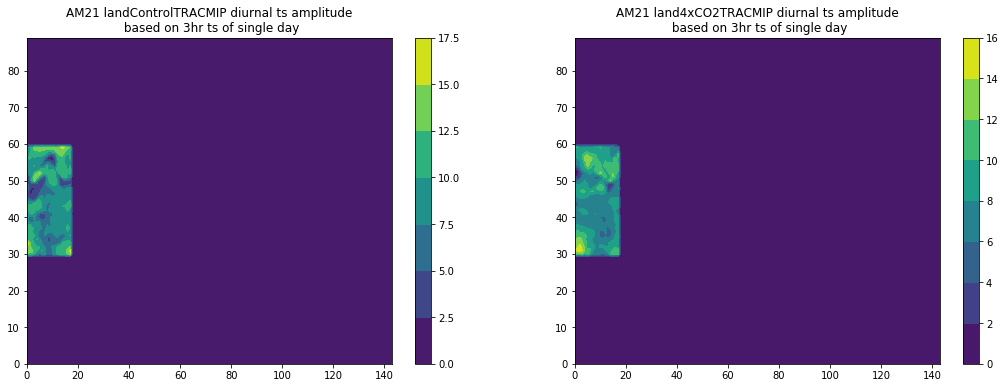

In [12]:
check_am21_land()

## Custom analysis for LMDZ5A

The UMiami server has daily tasmin and tasmax for LMDZ5A, but they were inadvertendly not included in the cmorizing and hence are not on ESGF.

In [13]:
def check_lmdz5a_land():
    import xarray as xr

    path='/home/fd8940/Dropbox/Projects/current/Tracmip/analysis/python3/corrigendum_paper/postdata_umiami/'
    tasmax_ldct = xr.open_dataset(path+'tasmax_Aday_IPSL-CM5A_LandControl_r1i1p1_202912.nc')['tasmax'].values
    tasmin_ldct = xr.open_dataset(path+'tasmin_Aday_IPSL-CM5A_LandControl_r1i1p1_202912.nc')['tasmin'].values
    tasmax_ld4x = xr.open_dataset(path+'tasmax_Aday_IPSL-CM5A_Land4xCO2_r1i1p1_202912.nc')['tasmax'].values
    tasmin_ld4x = xr.open_dataset(path+'tasmin_Aday_IPSL-CM5A_Land4xCO2_r1i1p1_202912.nc')['tasmin'].values
    tasmax_ldor = xr.open_dataset(path+'tasmax_Aday_IPSL-CM5A_LandOrbit_r1i1p1_202912.nc')['tasmax'].values
    tasmin_ldor = xr.open_dataset(path+'tasmin_Aday_IPSL-CM5A_LandOrbit_r1i1p1_202912.nc')['tasmin'].values    
    
    # plotting
    plt.figure(figsize=(18,6))
    plt.subplot(1,3,1)
    c=plt.contourf(np.nanmean(tasmax_ldct-tasmin_ldct, axis=0)); plt.colorbar(c)
    plt.title('LMDZ5A landControlTRACMIP diurnal ts amplitude\n based on day tasmax-tasmin of single month')
    plt.subplot(1,3,2)
    c=plt.contourf(np.nanmean(tasmax_ld4x-tasmin_ld4x, axis=0)); plt.colorbar(c)
    plt.title('LMDZ5A land4xCO2TRACMIP diurnal ts amplitude\n based on day tasmax-tasmin of single month')
    plt.subplot(1,3,3)
    c=plt.contourf(np.nanmean(tasmax_ldor-tasmin_ldor, axis=0)); plt.colorbar(c)
    plt.title('LMDZ5A landOrbitTRACMIP diurnal ts amplitude\n based on day tasmax-tasmin of single month')    
    plt.savefig('./figs/tas_diurnalcycle_lmdz5a_landControlTRACMIP_land4xCO2TRACMIP_landOrbitTRACMIP.pdf')

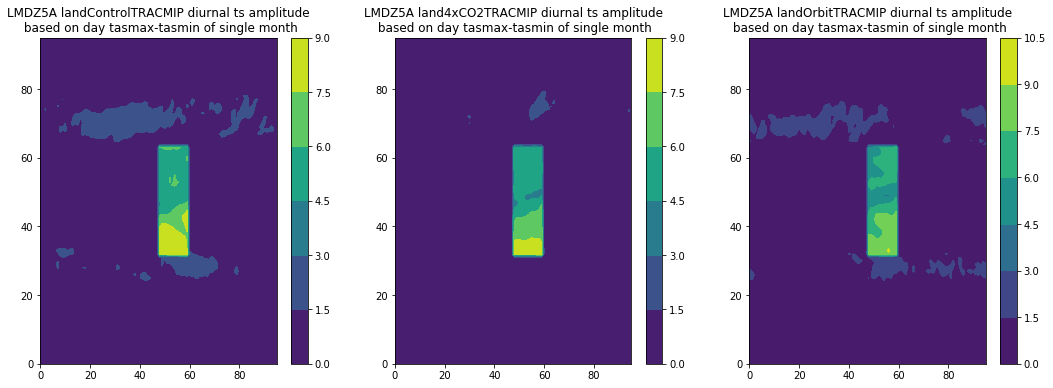

In [14]:
check_lmdz5a_land()

## Custom analysis for CAM5Nor

The UMiami server has daily tasmin and tasmax for CAM5Nor LandControlTRACMIP and Land4xCO2TRACMIP, 
but tasmin was inadvertendly not included in the cmorizing and hence is not on ESGF.

In [15]:
def check_cam5nor_land():
    import xarray as xr

    path='/home/fd8940/Dropbox/Projects/current/Tracmip/analysis/python3/corrigendum_paper/postdata_umiami/'
    tasmax_ldct = xr.open_dataset(path+'CAM5Nor_tasmax_day_LandControl_amip_r1i1p1_008512.nc')['tasmax'].values
    tasmin_ldct = xr.open_dataset(path+'CAM5Nor_tasmin_day_LandControl_amip_r1i1p1_008512.nc')['tasmin'].values
    tasmax_ld4x = xr.open_dataset(path+'CAM5Nor_tasmax_day_Land4xCO2_amip_r1i1p1_012512.nc')['tasmax'].values
    tasmin_ld4x = xr.open_dataset(path+'CAM5Nor_tasmin_day_Land4xCO2_amip_r1i1p1_012512.nc')['tasmin'].values
    
    # plotting
    plt.figure(figsize=(18,6))
    plt.subplot(1,2,1)
    c=plt.contourf(np.nanmean(tasmax_ldct-tasmin_ldct, axis=0)); plt.colorbar(c)
    plt.title('CAM5Nor landControlTRACMIP diurnal ts amplitude\n based on day tasmax-tasmin of single month')
    plt.subplot(1,2,2)
    c=plt.contourf(np.nanmean(tasmax_ld4x-tasmin_ld4x, axis=0)); plt.colorbar(c)
    plt.title('CAM5Nor land4xCO2TRACMIP diurnal ts amplitude\n based on day tasmax-tasmin of single month')   
    plt.savefig('./figs/tas_diurnalcycle_cam5nor_landControlTRACMIP_land4xCO2TRACMIP.pdf')

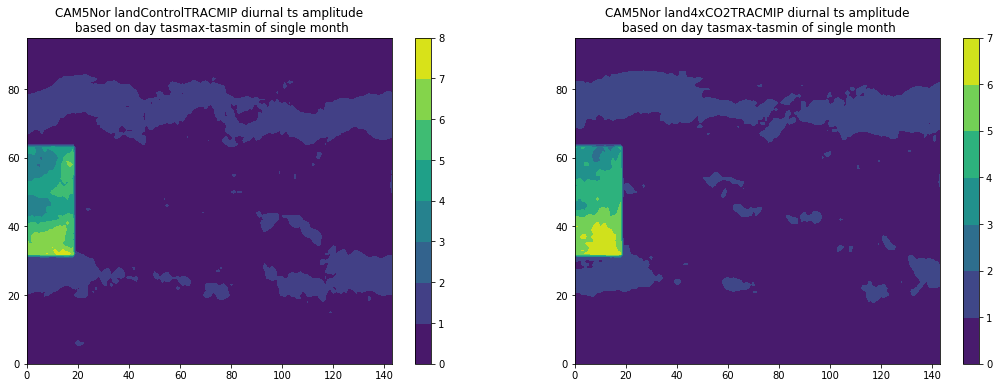

In [16]:
check_cam5nor_land()